<a href="https://colab.research.google.com/github/arsathrahim/NM-phase-5/blob/main/Project_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from hashlib import sha256
from datetime import datetime
import random

In [2]:
pip install pandas matplotlib scikit-learn

In [3]:
def generate_energy_data(days=30):
    timestamps = pd.date_range(start="2025-01-01", periods=days, freq='D')
    base_usage = np.random.normal(loc=30, scale=5, size=days)  # kWh
    temperature = np.random.normal(loc=22, scale=5, size=days)  # Celsius
    energy_data = pd.DataFrame({
        'Date': timestamps,
        'Energy_Usage_kWh': base_usage,
        'Temperature_C': temperature
    })

    # Add a few anomalies
    energy_data.loc[random.randint(5, 25), 'Energy_Usage_kWh'] += random.randint(15, 30)
    return energy_data

In [4]:
def detect_anomalies(df):
    model = IsolationForest(contamination=0.1)
    df['Anomaly'] = model.fit_predict(df[['Energy_Usage_kWh']])
    return df

In [5]:
def generate_recommendations(df):
    mean_usage = df['Energy_Usage_kWh'].mean()
    recommendations = []

    if mean_usage > 32:
        recommendations.append("Consider using smart thermostats to reduce average consumption.")
    if (df['Anomaly'] == -1).sum() > 0:
        recommendations.append("Anomalies detected. Investigate sudden spikes in energy use.")
    if df['Temperature_C'].mean() > 25:
        recommendations.append("High temperatures detected — optimize cooling systems.")

    return recommendations

In [6]:
def generate_hash(record):
    return sha256(str(record).encode()).hexdigest()

def simulate_blockchain_log(df):
    df['Hash'] = df.apply(lambda row: generate_hash(row.to_dict()), axis=1)
    return df

In [8]:
def multilingual_message(language='en'):
    messages = {
        'en': "Welcome to your AI-powered energy dashboard.",
        'es': "Bienvenido a su panel de energía impulsado por IA.",
        'fr': "Bienvenue sur votre tableau de bord énergétique IA.",
        'de': "Willkommen bei Ihrem KI-Energie-Dashboard."
    }
    return messages.get(language, messages['en'])

In [11]:
def plot_energy_usage(df):
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Date', y='Energy_Usage_kWh', data=df, label='Energy Usage')
    plt.scatter(
        df[df['Anomaly'] == -1]['Date'],
        df[df['Anomaly'] == -1]['Energy_Usage_kWh'],
        color='red', label='Anomaly', zorder=5
    )
    plt.title('Energy Usage Over Time')
    plt.xlabel('Date')
    plt.ylabel('Energy (kWh)')
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_usage_bar(df):
    plt.figure(figsize=(10, 5))
    df.groupby(df['Date'].dt.day)['Energy_Usage_kWh'].mean().plot(kind='bar', color='skyblue')
    plt.title('Average Daily Energy Usage')
    plt.xlabel('Day of Month')
    plt.ylabel('kWh')
    plt.tight_layout()
    plt.show()

Welcome to your AI-powered energy dashboard.

Sample Energy Data with Anomaly and Hash:
         Date  Energy_Usage_kWh  Temperature_C  Anomaly  \
0 2025-01-01         31.015434      26.631165        1   
1 2025-01-02         36.792400      22.793722        1   
2 2025-01-03         37.251331      25.727160        1   
3 2025-01-04         21.316574      23.587324       -1   
4 2025-01-05         35.493969      26.349408        1   

                                                Hash  
0  999e7c96c66b01d2c6d5c6ce637d2fdb33489061aaa2fd...  
1  b23913739befe409d9f234b693b28afa24445c2d3d28a5...  
2  676f068e4adda5a69dc3223ee2b57efa51d896a955d46d...  
3  9c540ef5eb62fe201c1e3df8c37f06bc7fcac2abd744a2...  
4  fb19adab2903ebbb181410b65179d1f5b750cfe3f47d20...  

AI Recommendations:
✔ Consider using smart thermostats to reduce average consumption.
✔ Anomalies detected. Investigate sudden spikes in energy use.


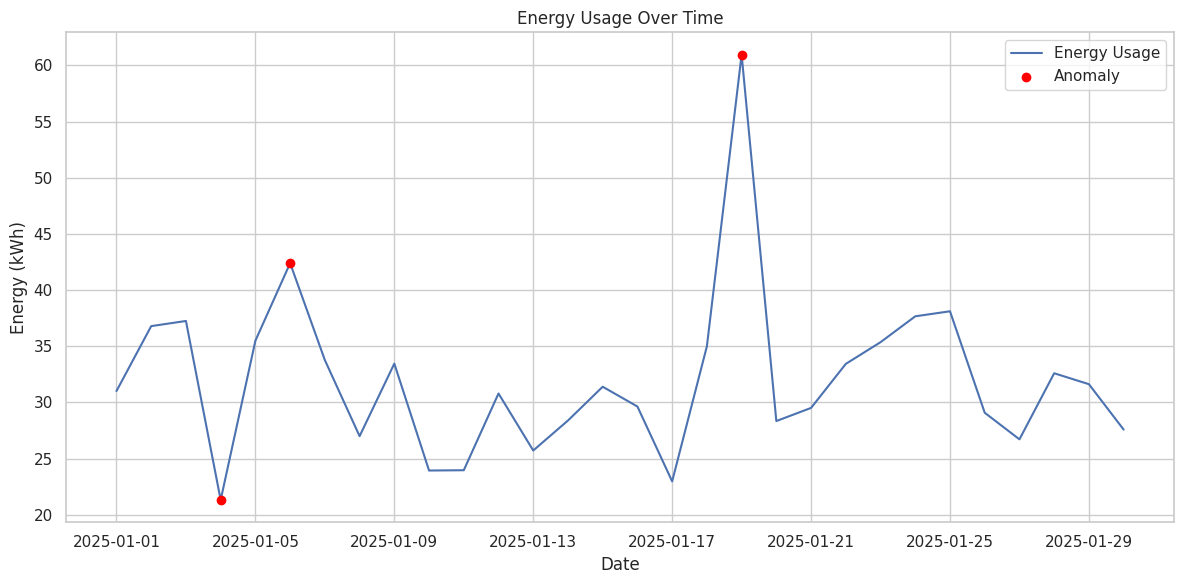

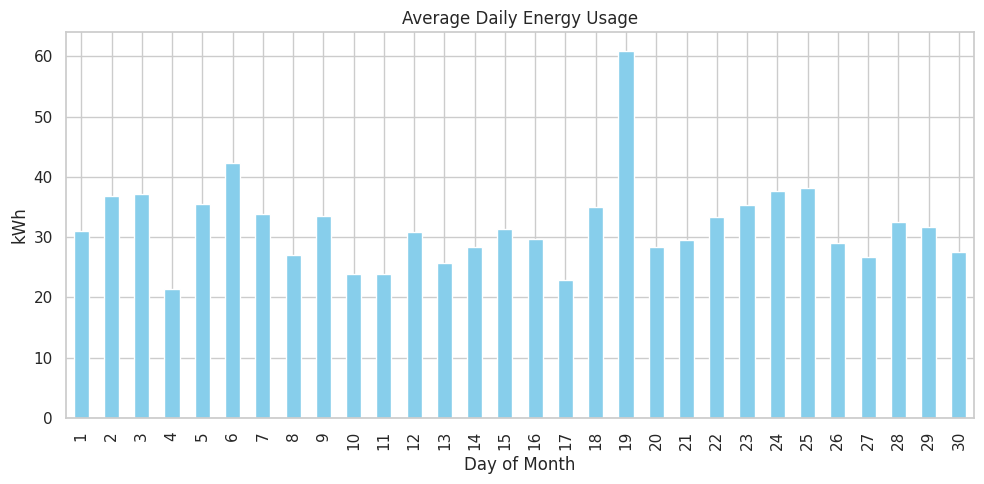

In [14]:
# Greet the user
print(multilingual_message('en'))

# Step-by-step processing
data = generate_energy_data(30)
data = detect_anomalies(data)
data = simulate_blockchain_log(data)

# Show sample
print("\nSample Energy Data with Anomaly and Hash:\n", data.head())

# AI-based Recommendations
recs = generate_recommendations(data)
print("\nAI Recommendations:")
for rec in recs:
    print("✔", rec)

# Graphs
plot_energy_usage(data)
plot_usage_bar(data)